#Aim: Implementation of disease(Tumor) detection using CNN

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/content/brain-mri-images-for-brain-tumor-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/brain-mri-images-for-brain-tumor-detection/yes/Y147.JPG
/content/brain-mri-images-for-brain-tumor-detection/yes/Y115.JPG
/content/brain-mri-images-for-brain-tumor-detection/yes/Y39.jpg
/content/brain-mri-images-for-brain-tumor-detection/yes/Y55.jpg
/content/brain-mri-images-for-brain-tumor-detection/yes/Y67.JPG
/content/brain-mri-images-for-brain-tumor-detection/yes/Y86.JPG
/content/brain-mri-images-for-brain-tumor-detection/yes/Y8.jpg
/content/brain-mri-images-for-brain-tumor-detection/yes/Y52.jpg
/content/brain-mri-images-for-brain-tumor-detection/yes/Y157.JPG
/content/brain-mri-images-for-brain-tumor-detection/yes/Y92.jpg
/content/brain-mri-images-for-brain-tumor-detection/yes/Y153.jpg
/content/brain-mri-images-for-brain-tumor-detection/yes/Y2.jpg
/content/brain-mri-images-for-brain-tumor-detection/yes/Y112.JPG
/content/brain-mri-images-for-brain-tumor-detection/yes/Y117.JPG
/content/brain-mri-images-for-brain-tumor-detection/yes/Y250.jpg
/content/brain-mri-images-for-brain

In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [4]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
result[0]        

array([[1., 0.]])

In [5]:
paths = []
for r, d, f in os.walk(r"/content/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(139,2)
result.shape

(139, 2)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [10]:
x_train.shape

(111, 128, 128, 3)

In [11]:
y_train.shape

(111, 2)

In [12]:
history = model.fit(x_train, y_train,
                   epochs = 40,
                   batch_size = 128,
                   verbose = 1,
                   validation_data = (x_test, y_test))

Epoch 1/40
1/1 [==============================] - 8s 8s/step - loss: 2.7492 - val_loss: 190.7144
Epoch 2/40
1/1 [==============================] - 6s 6s/step - loss: 74.8215 - val_loss: 31.9185
Epoch 3/40
1/1 [==============================] - 6s 6s/step - loss: 36.0593 - val_loss: 77.4520
Epoch 4/40
1/1 [==============================] - 6s 6s/step - loss: 21.6424 - val_loss: 69.6422
Epoch 5/40
1/1 [==============================] - 6s 6s/step - loss: 15.2133 - val_loss: 21.7218
Epoch 6/40
1/1 [==============================] - 6s 6s/step - loss: 8.5163 - val_loss: 12.7837
Epoch 7/40
1/1 [==============================] - 6s 6s/step - loss: 1.3409 - val_loss: 49.8092
Epoch 8/40
1/1 [==============================] - 6s 6s/step - loss: 1.6471 - val_loss: 74.3594
Epoch 9/40
1/1 [==============================] - 7s 7s/step - loss: 2.1916 - val_loss: 82.9126
Epoch 10/40
1/1 [==============================] - 8s 8s/step - loss: 3.8626 - val_loss: 79.4527
Epoch 11/40
1/1 [=================

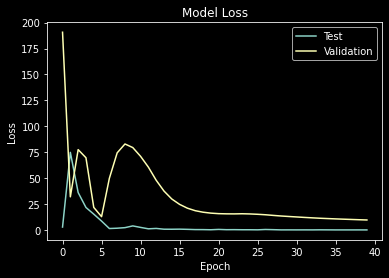

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')




plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [16]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


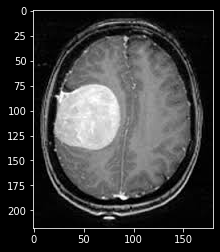

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is Its a Tumor


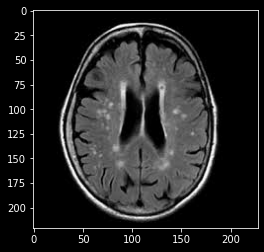

In [19]:
img = Image.open(r"/content/brain-mri-images-for-brain-tumor-detection/no/18 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))